In [8]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color.palettes import rgb


read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [9]:
def data(df_war,df,party):
    high_values = df_war[df_war['standardized_war_articles'] >= 0.2]
    first = high_values['date'].iloc[-1]
    last = high_values['date'].iloc[0]

    # training
    data_before_war = df[(df['date'] <= first) & (~df[party].isna())]

    # validaten for media relevant
    data_media_relevant = df[(df['date'] >= first) & (df['date'] <= last)]
    return data_before_war, data_media_relevant


# Iraq war
this_df = df[(df['date'].dt.year >= 2002) & (df['date'].dt.year <= 2004)]

# ukraine war
#this_df = df[(df['date'].dt.year >= 2022)]

data_before_war, data_media_relevant = data(this_df, df, 'Grüne')

In [30]:
def poly_regression(data_before_war, data_media_relevant, party):
   

    X = data_before_war.index.values.reshape(-1,1)
    y = data_before_war[party]
    

    polynomial_features= PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X)

    
    model = sm.OLS(y, X_poly).fit()
    y_pred = model.predict(X_poly) 
    #confidence interval
    _, upper,lower = wls_prediction_std(model)
    
    X_val = data_media_relevant.index.values.reshape(-1,1)
    polynomial_features= PolynomialFeatures(degree=3)
    X_val_poly = polynomial_features.fit_transform(X_val)
    y_val = data_media_relevant[party]
    
    y_val_pred = model.predict(X_val_poly) 

    
    return y_pred, y_val_pred, upper, lower


gruene_y_pred, gruene_y_val_pred, gruene_upper, gruene_lower = poly_regression(data_before_war, data_media_relevant, 'Grüne' )
spd_y_pred, spd_y_val_pred, spd_upper, spd_lower = poly_regression(data_before_war, data_media_relevant, 'SPD' )
union_y_pred, union_y_val_pred, union_upper, union_lower = poly_regression(data_before_war, data_media_relevant, 'Union' )

linke_y_pred, linke_y_val_pred, linke_upper, linke_lower = poly_regression(data_before_war, data_media_relevant, 'Linke' )
fdp_y_pred, fdp_y_val_pred, fdp_upper, fdp_lower = poly_regression(data_before_war, data_media_relevant, 'FDP' )

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


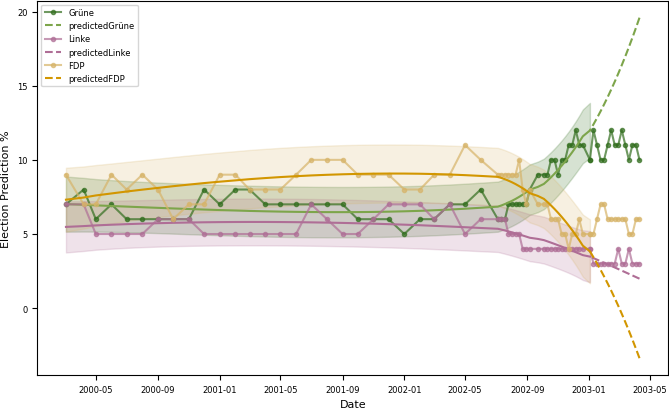

In [35]:
#plot
plt.rcParams.update(bundles.icml2022(column='full', nrows=2, ncols=2, usetex=False))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')

# grüne
ax1.plot(data_before_war['date'], data_before_war['Grüne'], marker='.', linestyle='-',label='Grüne', color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_before_war['date'],gruene_y_pred, color = rgb.tue_green)

ax1.fill_between(data_before_war['date'], gruene_upper, gruene_lower, color=rgb.tue_darkgreen, alpha=0.2)

ax1.plot(data_media_relevant['date'], data_media_relevant['Grüne'], marker='.', linestyle='-', color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_media_relevant['date'],gruene_y_val_pred, linestyle='--', color = rgb.tue_green, label = 'predicted' + 'Grüne')

# linke
ax1.plot(data_before_war['date'], data_before_war['Linke'], marker='.', linestyle='-',label='Linke', color=rgb.tue_violet, alpha=0.7)
ax1.plot(data_before_war['date'],linke_y_pred, color = rgb.tue_violet)

ax1.fill_between(data_before_war['date'], linke_upper, linke_lower, color=rgb.tue_violet, alpha=0.2)

ax1.plot(data_media_relevant['date'], data_media_relevant['Linke'], marker='.', linestyle='-', color=rgb.tue_violet, alpha=0.7)
ax1.plot(data_media_relevant['date'],linke_y_val_pred, linestyle='--', color = rgb.tue_violet, label = 'predicted' + 'Linke')

# fdp
ax1.plot(data_before_war['date'], data_before_war['FDP'], marker='.', linestyle='-',label='FDP', color=rgb.tue_lightorange, alpha=0.7)
ax1.plot(data_before_war['date'],fdp_y_pred, color = rgb.tue_orange)

ax1.fill_between(data_before_war['date'], fdp_upper, fdp_lower, color=rgb.tue_lightorange, alpha=0.2)

ax1.plot(data_media_relevant['date'], data_media_relevant['FDP'], marker='.', linestyle='-', color=rgb.tue_lightorange, alpha=0.7)
ax1.plot(data_media_relevant['date'],fdp_y_val_pred, linestyle='--', color = rgb.tue_orange, label = 'predicted' + 'FDP')
ax1.legend(loc='upper left')

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


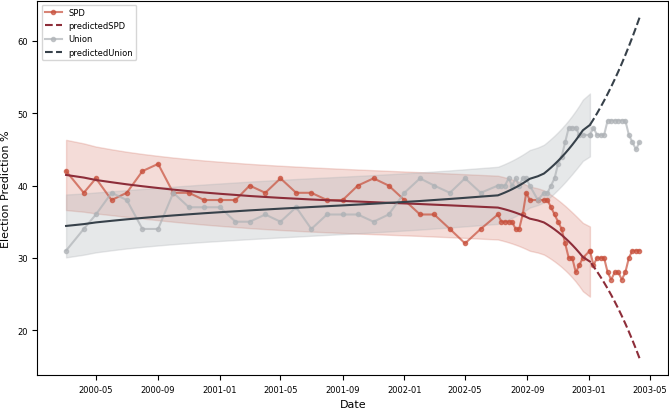

In [46]:
#plot
plt.rcParams.update(bundles.icml2022(column='full', nrows=2, ncols=2, usetex=False))
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')

# spd
ax1.plot(data_before_war['date'], data_before_war['SPD'], marker='.', linestyle='-',label='SPD', color=rgb.tue_ocre, alpha=0.7)
ax1.plot(data_before_war['date'],spd_y_pred, color = rgb.tue_red)

ax1.fill_between(data_before_war['date'], spd_upper, spd_lower, color=rgb.tue_ocre, alpha=0.2)

ax1.plot(data_media_relevant['date'], data_media_relevant['SPD'], marker='.', linestyle='-', color=rgb.tue_ocre, alpha=0.7)
ax1.plot(data_media_relevant['date'],spd_y_val_pred, linestyle='--', color = rgb.tue_red, label = 'predicted' + 'SPD')

# union
ax1.plot(data_before_war['date'], data_before_war['Union'], marker='.', linestyle='-',label='Union', color=rgb.tue_gray, alpha=0.7)
ax1.plot(data_before_war['date'],union_y_pred, color = rgb.tue_dark)

ax1.fill_between(data_before_war['date'], union_upper, union_lower, color=rgb.tue_gray, alpha=0.3)

ax1.plot(data_media_relevant['date'], data_media_relevant['Union'], marker='.', linestyle='-', color=rgb.tue_gray, alpha=0.7)
ax1.plot(data_media_relevant['date'],union_y_val_pred, linestyle='--', color = rgb.tue_dark, label = 'predicted' + 'Union')
ax1.legend(loc='upper left')